# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net
from diff_equation import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)
np.random.seed(10)

# Training Data and Nondimensionalization

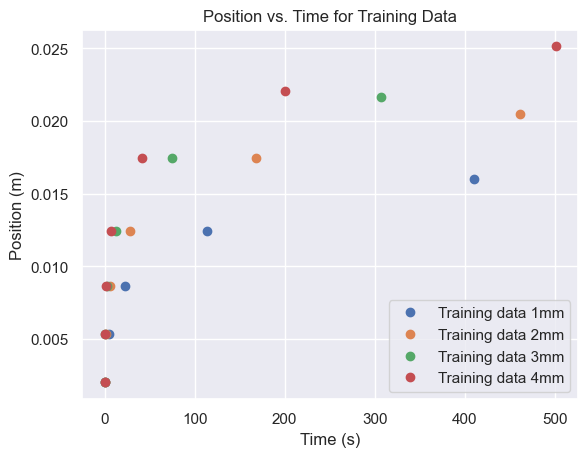

In [2]:
# Grab training data
dim_data, nondim_data = grab_training_data()

# Define legends for dimensionalized and nondimensionalized data
dim_legend = ['Training data 1mm', 'Training data 2mm', 'Training data 3mm', 'Training data 4mm']
nondim_legend = ['Nondim training data 1mm', 'Nondim training data 2mm', 'Nondim training data 3mm', 'Nondim training data 4mm']

# Functions to plot dimensionalized and nondimensionalized data
def plot_dim_data(show=True):
    for i in range(0, len(dim_data)):
        plt.plot(dim_data[i]['TIME'], dim_data[i]['DISTANCE'], 'o')
    plt.legend(dim_legend)
    plt.ylabel('Position (m)')
    plt.xlabel('Time (s)')
    plt.title('Position vs. Time for Training Data')
    if show:
        plt.show()

def plot_nondim_data(show=True):
    for i in range(0, len(nondim_data)):
        plt.plot(nondim_data[i]['TIME'], nondim_data[i]['DISTANCE'], 'o')
    plt.legend(nondim_legend)
    plt.ylabel('Scaled Position')
    plt.xlabel('Log-Scaled Time')
    plt.title('Scaled Position vs. Time for Training Data')
    if show:
        plt.show()

# Plot dimensionalized training data
plot_dim_data()

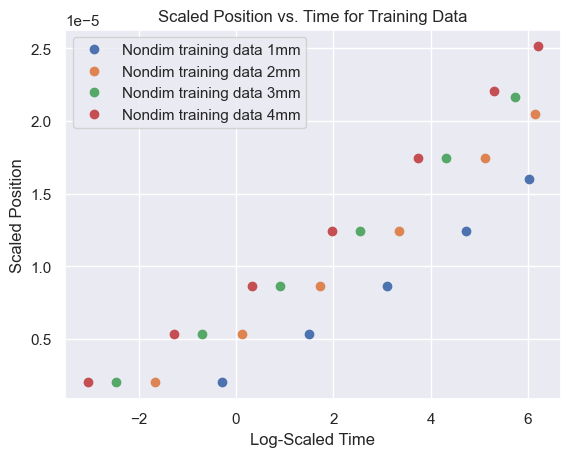

In [3]:
# Plot nondimensionalized training data
plot_nondim_data()

# Trying Different Loss Weights for Physics Loss + Data Loss

In [4]:
# different_lambdas = torch.linspace(0, 500, 25)
# losses_each_lambda = torch.empty(len(different_lambdas))

# for i in range(0, len(different_lambdas)):
#     net = Net(1,1, loss2=physics_loss, epochs=5000, loss2_weight=different_lambdas[i], lr=0.5).to(DEVICE)
#     losses_each_lambda[i] = net.fit(train_t, train_x)[-1]

# plt.plot(different_lambdas, losses_each_lambda)
# plt.legend(['Loss vs. Lambda'])
# plt.ylabel('Loss')
# plt.xlabel('Lambda')

# Run the Model

Losses for 1mm droplet:


c:\Users\rahav\Documents\GitHub\pinns-model\src\ferrofluid\diff_equation.py:92: RuntimeWarning: divide by zero encountered in log
  ts = torch.linspace(np.log(0), np.log(600), steps=600,).view(-1, 1).requires_grad_(True).to(DEVICE)
c:\Users\rahav\Documents\GitHub\pinns-model\.venv\Lib\site-packages\torch\autograd\graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1/5000, data loss: 166604.0, physics loss: nan
Epoch 2/5000, data loss: nan, physics loss: nan
Epoch 3/5000, data loss: nan, physics loss: nan
Epoch 4/5000, data loss: nan, physics loss: nan
Epoch 5/5000, data loss: nan, physics loss: nan
Epoch 6/5000, data loss: nan, physics loss: nan
Epoch 7/5000, data loss: nan, physics loss: nan
Epoch 8/5000, data loss: nan, physics loss: nan
Epoch 9/5000, data loss: nan, physics loss: nan
Epoch 10/5000, data loss: nan, physics loss: nan
Epoch 500/5000, data loss: nan, physics loss: nan
Epoch 1000/5000, data loss: nan, physics loss: nan
Epoch 1500/5000, data loss: nan, physics loss: nan
Epoch 2000/5000, data loss: nan, physics loss: nan
Epoch 2500/5000, data loss: nan, physics loss: nan
Epoch 3000/5000, data loss: nan, physics loss: nan
Epoch 3500/5000, data loss: nan, physics loss: nan
Epoch 4000/5000, data loss: nan, physics loss: nan
Epoch 4500/5000, data loss: nan, physics loss: nan
Epoch 5000/5000, data loss: nan, physics loss: nan



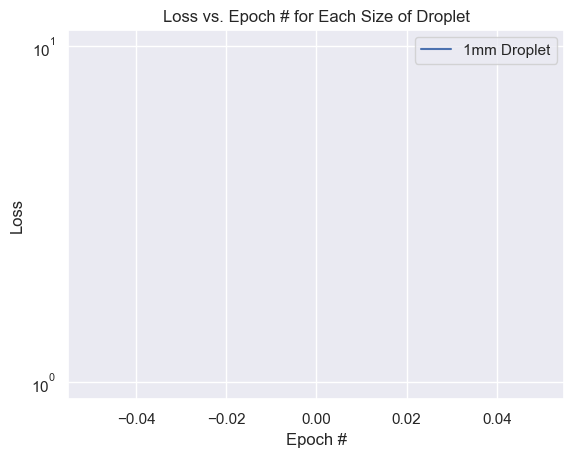

In [5]:
plt.yscale('log')
different_droplet_networks = [None] * len(dim_data)

'''
Train model for each droplet size, plot losses for each one.
Change the bounds on this loop and subsequent ones from '0', 'len(different_droplet_networks)' to '0', '1' to do only the 1mm droplet.
You can change the bounds similarly to only train the network for other-sized droplets.
'''
for i in range(0, 1):
# for i in range(0, len(different_droplet_networks)):
    different_droplet_networks[i] = Net(1, 1, droplet_size_idx=i, loss2=physics_loss_nondim, epochs=5000, loss1_weight=100000000, loss2_weight=0.00001, lr=1e-5).to(DEVICE)
    print(f'Losses for {i+1}mm droplet:')
    losses = different_droplet_networks[i].fit(np.array(nondim_data[i]['TIME']), np.array(nondim_data[i]['DISTANCE']))
    print()
    plt.plot(losses)
plt.legend(['1mm Droplet', '2mm Droplet', '3mm Droplet', '4mm Droplet'])
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch # for Each Size of Droplet')
plt.show()

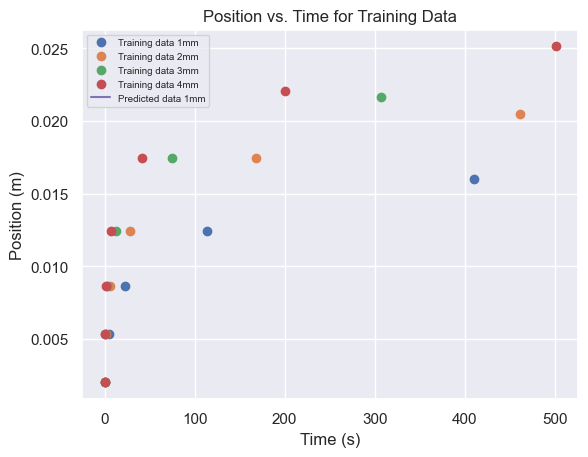

In [6]:
'''
Plot the dimensionalized data for each droplet as well as each respective dimensionalized model
'''

# Plot dimensionalized data
plot_dim_data(show=False)

# Use nondimensionalized model to make prediction
times = np.linspace(3.35, np.log(1200), 1200)
preds = different_droplet_networks[i].predict(times)

# Plot dimensionalized model
for i in range(0, 1):
# for i in range(0, len(different_droplet_networks)):
    plt.plot(np.exp(times), x_0*preds)
    dim_legend.append(f'Predicted data {i+1}mm')
plt.legend(dim_legend, fontsize=7)
plt.show()

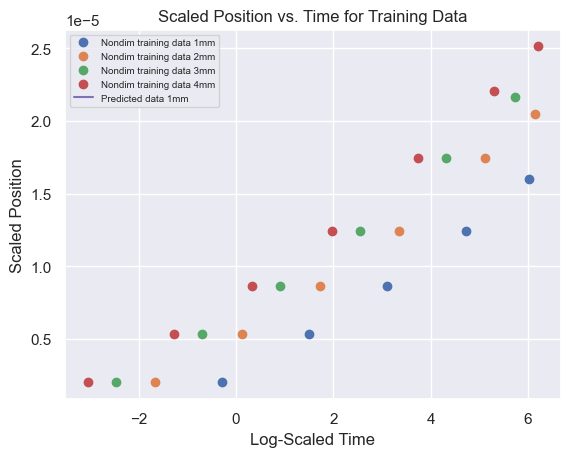

In [7]:
'''
Plot the nondimensionalized data for each droplet as well as each respective nondimensionalized model
'''

# Plot nondimensionalized data
plot_nondim_data(show=False)

# Plot nondimensionalized model
for i in range(0, 1):
# for i in range(0, len(different_droplet_networks)):
    plt.plot(times, preds)
    nondim_legend.append(f'Predicted data {i+1}mm')
plt.legend(nondim_legend, fontsize=7)
plt.show()